# Basics of stochastic calculus

This notbook intends to model stochastic process in the most rigorous way. It widely uses the framework established by C. W. Gardiner in [1]

## Wiener process

Lets first model a Wiener process.
The process (as a continuous Markov process) is characterised by the following Fokker-Plank equation, wh en $D = 1$ :
$$\dfrac{\partial p}{\partial t} = \dfrac{D}{2}\dfrac{\partial^2 p}{\partial w^2}$$
where $p$ stands for $p(w,t \,\vert\, w_0, t_0)$ and the initial condition being :
$$p(w,t_0 \,\vert\, w_0, t_0) = \delta(w - w_0)$$
The distribution solving this equation is :
$$p(w,t \,\vert\, w_0, t_0) = \dfrac{1}{\sqrt{2\pi D(t-t_0)}}\exp\left[\dfrac{-(w-w_0)^2}{2D(t-t_0)}\right]$$
To model this in a numerical simulation, we must discretise time and space.

### With a random walk

The first possibility is to simulate a random walk where a variable $x(t)$ could take increments of $+dx$ or $-dx$, with equal probabilty, at each timestep of size $dt$. Both $dx$ and $dt$ are finite.

Lets try it :

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

dx = 0.0625
dt = 0.00390625
num = 256

mean = 0.9732490272373541
var = 0.1375990741722055
delta = 32


<IPython.core.display.Javascript object>


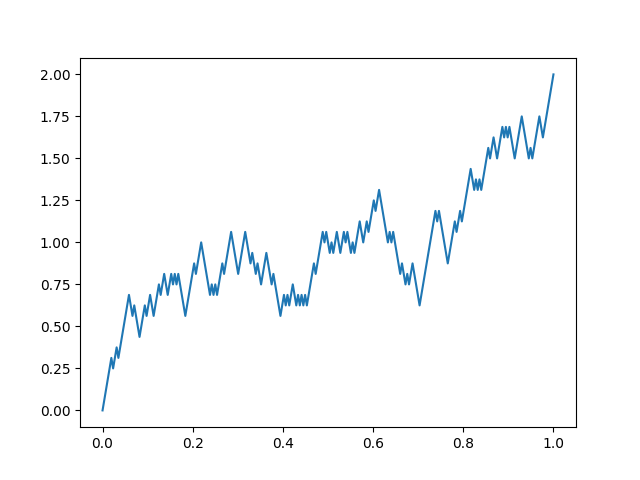

In [2]:
duration = 1 # duration, related to a time

dx = 2**-4 # spatial dicretisation
dt = 2**-8 # time dicretisation

D = dx**2/dt # diffusion coefficient
num = int(duration/dt)


# generating the process
xs = 2*np.random.randint(2, size=num+1)-1
xs[0] = 0
xs = dx*np.cumsum(xs)

# printing various features
mean = np.average(xs)
var = np.var(xs)
delta = int(xs[-1]/dx)
print('dx = ' + str(dx) + '\ndt = ' + str(dt) + '\nnum = ' + str(num) + '\n\nmean = ' + str(mean) + '\nvar = ' + str(var) + '\ndelta = ' + str(delta))

# plotting results

ts = np.linspace(0, duration, num=num+1)
plt.plot(ts, xs)
plt.show()

We created a random walk. Lets attribute it a diffusion coefficient `D = dx**2/dt`. We will consider it as an input.

In [3]:
def randWalk(D, duration, num=1000, verbose=False) :
    # simulation parameters
    dt = duration/num # time dicretisation
    dx = np.sqrt(D*dt) # spatial dicretisation

    # generating the process
    xs = 2*np.random.randint(2, size=num+1)-1
    xs[0] = 0
    xs = dx*np.cumsum(xs)
    ts = np.linspace(0, duration, num=num+1)

    # printing various features
    if verbose :
        mean = np.average(xs)
        var = np.var(xs)
        delta = int(xs[-1]/dx)
        print('dx = ' + str(dx) + '\ndt = ' + str(dt) + '\nnum = ' + str(num) + '\n\nmean = ' + str(mean) + '\nvar = ' + str(var) + '\ndelta = ' + str(delta))
    
    return ts, xs

<IPython.core.display.Javascript object>


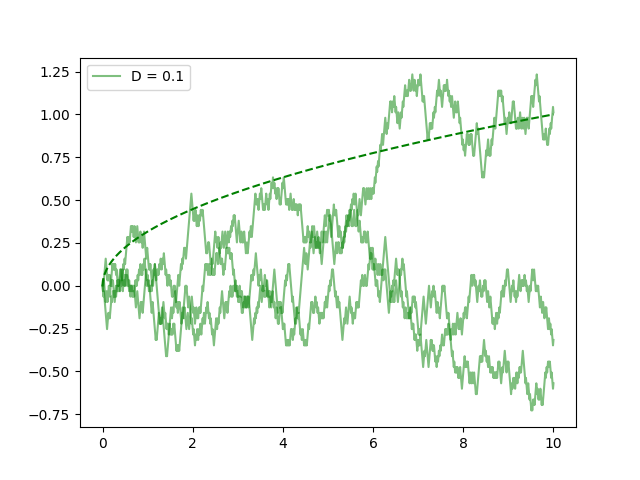

In [4]:
N = 1000
Ds = [10, 2, 0.1]


plt.figure()
cols = ['blue', 'red', 'green']

for i in range(2,3) :
    for j in range(3) :
        D = Ds[i]
        ts, xs = randWalk(D, duration=10, num=N)
        if j == 0 :
            plt.plot(ts, xs, color=cols[i], alpha=0.5, label = 'D = '+str(D))
            plt.plot(ts, np.sqrt(D*ts), color=cols[i], ls='--')
        else :
            plt.plot(ts, xs, alpha=0.5, color=cols[i])
plt.legend()
plt.show()

### With gaussian noises

Here we directly sample gaussian variables. We generate gaussian variables $\Delta_i$ of mean $0$ and variance $dx^2 = Ddt$. When summed-up, they give the correct variable of mean $0$ and variance $D(t-t_0)$.

dx = 0.0625
dt = 0.00390625
num = 256

mean = 1.0765466434374305
var = 0.5341835792140559
delta = 6


<IPython.core.display.Javascript object>


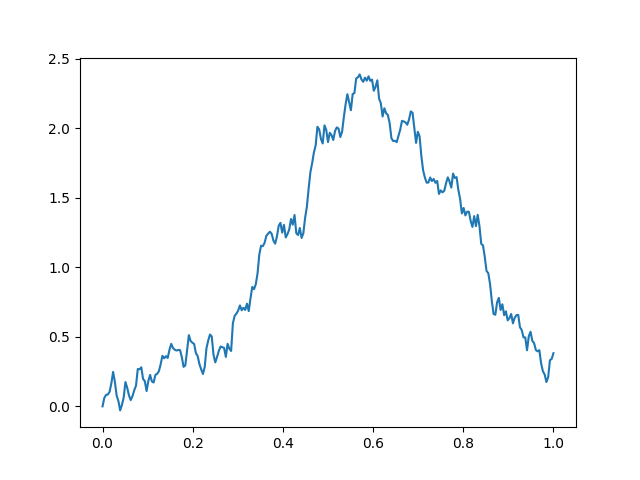

In [5]:
duration = 1 # duration, related to a time

dx = 2**-4 # spatial dicretisation
dt = 2**-8 # time dicretisation

D = dx**2/dt # diffusion coefficient
num = int(duration/dt)
sigma = dx


# generating the process
deltas = np.random.normal(scale=sigma, size=num+1)
deltas[0] = 0
xs = np.cumsum(deltas)


# printing various features
mean = np.average(xs)
var = np.var(xs)
delta = int(xs[-1]/dx)
print('dx = ' + str(dx) + '\ndt = ' + str(dt) + '\nnum = ' + str(num) + '\n\nmean = ' + str(mean) + '\nvar = ' + str(var) + '\ndelta = ' + str(delta))


# plotting results
ts = np.linspace(0, duration, num=num+1)
plt.plot(ts, xs)
plt.show()

Again, we create a pure gaussian process with diffusion coefficient $D$.

In [6]:
def gaussianP(D, duration, num=1000, verbose=False) :
    # simulation parameters
    dt = duration/num # time dicretisation
    dx = np.sqrt(D*dt) # spatial dicretisation
    sigma = dx


    # generating the process
    deltas = np.random.normal(scale=sigma, size=num+1)
    deltas[0] = 0
    xs = np.cumsum(deltas)
    ts = np.linspace(0, duration, num=num+1)

    # printing various features
    if verbose :
        mean = np.average(xs)
        var = np.var(xs)
        delta = int(xs[-1]/dx)
        print('dx = ' + str(dx) + '\ndt = ' + str(dt) + '\nnum = ' + str(num) + '\n\nmean = ' + str(mean) + '\nvar = ' + str(var) + '\ndelta = ' + str(delta))
    
    return ts, xs

<IPython.core.display.Javascript object>


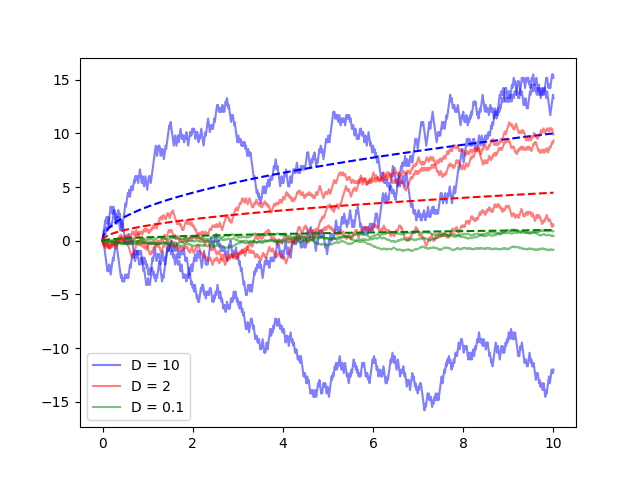

In [7]:
N = 1000
Ds = [10, 2, 0.1]


plt.figure()
cols = ['blue', 'red', 'green']

for i in range(3) :
    for j in range(3) :
        D = Ds[i]
        ts, xs = randWalk(D, duration=10, num=N)
        if j == 0 :
            plt.plot(ts, xs, color=cols[i], alpha=0.5, label = 'D = '+str(D))
            plt.plot(ts, np.sqrt(D*ts), color=cols[i], ls='--')
        else :
            plt.plot(ts, xs, alpha=0.5, color=cols[i])
plt.legend()
plt.show()

### Comparing the two

Lets now compare the two methods that generates a pure gaussian diffusion process :
- with a fixed-step random walk,
- with a Langevin equation with gaussian noise.

<IPython.core.display.Javascript object>


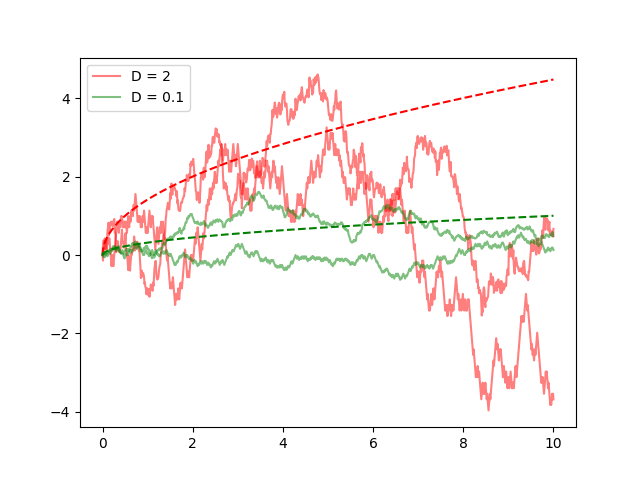

In [8]:
N = 1000
Ds = [10, 2, 0.1]


plt.figure()
cols = ['blue', 'red', 'green']

for i in range(1,3) :
    for j in range(1) :
        D = Ds[i]
        ts, xs = randWalk(D, duration=10, num=N)
        ts_bis, xs_bis = gaussianP(D, duration=10, num=N)
        if j == 0 :
            plt.plot(ts, xs, color=cols[i], alpha=0.5, label = 'D = '+str(D))
            plt.plot(ts_bis, xs_bis, color=cols[i], alpha=0.5)
            plt.plot(ts, np.sqrt(D*ts), color=cols[i], ls='--')
        else :
            plt.plot(ts, xs, alpha=0.5, color=cols[i])
            plt.plot(ts_bis, xs_bis, color=cols[i], alpha=0.5)
plt.legend()
plt.show()

**Conclusion :** it works !

## Simulating Eq. 2 from [2]


### From Stratonovitch to Ito framework

Now we will simulate the following stochastic differential equation, interpreted in the Stratonovitch sense :
$$\dfrac{dW_i}{dt} = \eta_iW_i + \sum_{j \neq i} J_{ij}W_{j} - \sum_{j \neq i} J_{ji}W_{i}$$
where $\eta_i(t)$ is a gaussian white noise of mean $m$ and variance $2\sigma^2$.
The rigorous Stratonovitch-stochastic differential equation is thus :
$$dW_i(t) = \left[\sum_{j \neq i} J_{ij}W_{j} - \left(\sum_{j \neq i} J_{ji}\right)W_{i} + mW_{i}\right]dt + \big[\sqrt{2}\sigma W_{i}\big]d\mu(t)$$
where $d\mu(t)$ is the Wiener measure.

We will use the Cauchy-Euler scheme to integrate this equation, within the *Ito* framework. Thus we must adapt the equation so they both describe the same solution. According to the formalism established in [3], section 4.3.6, it becomes the following Ito-stochastic differential equation :
$$dW_i(t) = \left[\sum_{j \neq i} J_{ij}W_{j} - \left(\sum_{j \neq i} J_{ji}\right)W_{i} + mW_{i} + \sigma^2 W_{i}\right]dt + \big[\sqrt{2}\sigma W_{i}\big]d\mu(t)$$

We note the new term $\sigma^2W_{i}$ in the non-stochastic part.

### Numerical simulation

Lets generate the Wiener integration elements. They are increments of lenght $dt$ of a Wiener process $\mu(t)$. Thus, they are i.i.d. centered gaussian variables of variance $1 \times dt$. 

In [16]:
duration = 10
num = 1000

# generating the Wiener increments
dt = duration/num # time dicretisation
mus = np.random.normal(scale=np.sqrt(dt), size=num)

Now lets define the parameters $m$ and $\sigma$, the matrix $J$ (mean-field model) and the vector $\vec{W}$ :

In [20]:
# utility
def meanfieldMat(J_0, size) :
    mat = np.zeros((size,size))
    for i in range(size) :
        for j in range(size) :
            if i==j :
                mat[i,j] = - (size-1)*J_0/size
            else :
                mat[i,j] = J_0/size
    return mat

# parameters
N = 30 # number of agents
J_0 = 1
J = meanfieldMat(J_0, N)
m = 0.1
sigma = 2

# vector
W = np.zeros(N) + 1

Lets define a function `doStep()` that compute the next time-step according to Cauchy-Euler scheme :
$$W_{t+1} = A\Delta t + B \Delta\mu$$

In [23]:
def doStep(i) :
    global W
    W += [np.dot(J,W) + (m+sigma**2)*W]*dt + [np.sqrt(2)*sigma]*W*mus[i]
    return

And run the whole simulation :

In [24]:
for i in range(num) :
    doStep(i)


TypeError: can't multiply sequence by non-int of type 'float'

## References

[1] C. W. Gardiner, *Handbook of stochastic methods for physics, chemistry and the natural sciences*. Springer, 1997.

[2] J.-P. Bouchaud and M. Me ́zard, “Wealth condensation in a simple statistical model of economy,” *Physica A: Statistical Mechanics and its Applications*, vol. 282, 2000.

[3] C. W. Gardiner, *Handbook of stochastic methods for physics, chemistry and the natural sci- ences. Springer*, 1997.